# Lab 4 -- LDA
### Author: Esraaj Sarkar Gupta
### Date: 7th Feb, 2026

### Instructions:
* You need to code in this jupyter notebook only.
* Download this notebook and import in your jupyter lab.
* You need to write a partial code for step 0 to step 8 mentioned with prefix ##
* Fill the blanks where it is instructed in comments. 
* Leave other codes, structure as it is.
* Follow all the instructions commented in the cells.



**Answer the questions given at the end of this notebook within your report.**

**Upload this jupyter notebook after completion with your partial code and the report in one file in PDF format. Your file name should be yourname_lab4.pdf**

**Also upload the resulting image showing all the selected points and boundary line between them after LDA analysis.**

**Your submission should contain the pdf file and the output plot. Upload it on the LMS before the due time.**

In [17]:
import numpy as np ## import numpy
import cv2 ## import opencv
import matplotlib ## import matplotlib
import matplotlib.pyplot as plt ## import matplotlib pyplot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA ## from sklearn import LDA analysis
matplotlib.use('TkAgg')

##---------------------------------------------------
## Step 0: Install all other dependencies that occur at run time if  any module not found.
##---------------------------------------------------

print("All imports completed with no dependency errors.")

All imports completed with no dependency errors.


In [18]:
"""Esraaj's comment: I turn 19 on the 24th of this month :)"""
Number_of_points = int(24)  ## Number of points you want select from each strip. Recommended >= 20 

img = cv2.imread("Indian_Flag.jpg") ## Read the given image

def select_points(img, title):
    fig, ax = plt.subplots()
    #------------------------------------------
    ## step 1: Convert the img from BGR to RGB using cv2 and display it using cv2.imshow
    """Esraaj's Note: cv2.imshow() expects images to be in BRG.
                        Defaulting to using plt.imshow() instead."""
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_RGB)
    ## step 2: Put title of the image
    ax.set_title(title)
    ##-----------------------------------------
    
    # Set the cursor style to a plus sign
    fig.canvas.manager.set_window_title('Select Points')
    cursor = matplotlib.widgets.Cursor(ax, useblit=True, color='red', linewidth=1)
    plt.show(block=False)  # Show the image without blocking

    k = 0
    points : list = list([]) ## Create here an empty list to store points 

    while k < Number_of_points:
        xy = plt.ginput(1, timeout=0)  # Non-blocking input
        if len(xy) > 0:
            col, row = map(int, xy[0])  # Convert to integer
            ##-----------------------------------------------
            ## Step 3: Collect RGB values at the clicked positions (col, row) and print it. 
            ##-----------------------------------------------

            k += 1
            points.append([row, col, img_RGB[row, col]])  # Store RGB values in empty list points.
            """Esraaj's Note: Changed variable name img -> img_RGB to store RGB values instead of BGR."""
            # Display colored dot on the image
            plt.scatter(col, row, c='black', marker='o', s=10)

            # Redraw the image to include the dot
            plt.draw()

    plt.close()  # Close the window after all points are collected
    return points ## Fill this blank

In [19]:
##-----------------------------------------------------------------
## Step4: fill the blanks for Selected points from saffron strip
pts_saffron = select_points(img,
                            f"Select {Number_of_points} saffron points.")
## Step5: fill the blanks for Selected points from white strip)
pts_white = select_points(img,
                          f"Select {Number_of_points} white points.")
## Step6: fill the blanks for Selected points from green strip
pts_green = select_points(img,
                          f"Select {Number_of_points} green points.")
##-----------------------------------------------------------------

In [20]:
# Convert RGB values to Lab color space
def rgb_to_lab(rgb):
    return cv2.cvtColor(np.uint8([[rgb]]), cv2.COLOR_RGB2Lab)[0][0]

saffron_lab = np.array([rgb_to_lab(rgb) for col, row, rgb in pts_saffron])
white_lab = np.array([rgb_to_lab(rgb) for col, row, rgb in pts_white])
green_lab = np.array([rgb_to_lab(rgb) for col, row, rgb in pts_green])

## Step7: Extract a* and b* components from Lab color space
a_features = np.hstack((saffron_lab[:, 1], white_lab[:, 1], green_lab[:, 1]))
b_features = np.hstack((saffron_lab[:, 2], white_lab[:, 2], green_lab[:, 2]))

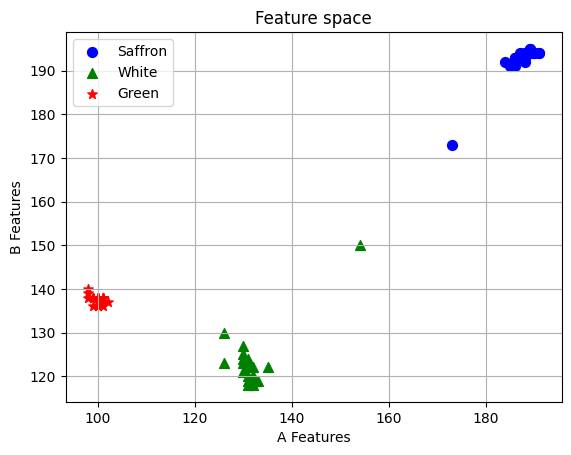

In [21]:
# Map class labels to numeric values
class_mapping = {'Saffron': 0, 'White': 1, 'Green': 2}
y = np.array([class_mapping[label] for label in ['Saffron'] * Number_of_points + ['White'] * Number_of_points + ['Green'] * Number_of_points])

%matplotlib inline

plt.figure()
plt.scatter(a_features[:Number_of_points], b_features[:Number_of_points], c='b', marker='o', s=50, label='Saffron')
plt.scatter(a_features[Number_of_points:2*Number_of_points], b_features[Number_of_points:2*Number_of_points], c='g', marker='^', s=50, label='White')
plt.scatter(a_features[2*Number_of_points:], b_features[2*Number_of_points:], c='r', marker='*', s=50, label='Green')
plt.legend(['Saffron', 'White', 'Green'], loc='best')
plt.xlabel('A Features')  ## Provide x label
plt.ylabel('B Features') ## Provide y label
plt.title('Feature space') ## Provide title
plt.grid()
plt.show()

##------------------------------------------------------------
# Step 8: Perform LDA analysis using LinearDiscriminantAnalysis() and lda.fit()
"""Esraaj's Note: Build feature matrix"""
X = np.column_stack((a_features, b_features))
"""Esraaj's Note: Fit the LDA model"""
lda = LDA()
lda.fit(X, y)
"""Esraaj's Note: Project data onto the LDA space"""
X_lda = lda.transform(X)
##-----------------------------------------------------------



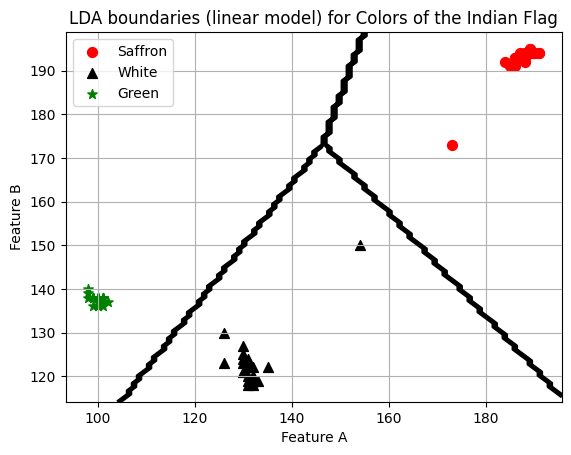

In [23]:
# Plot LDA boundaries
plt.figure()
plt.scatter(a_features[:Number_of_points], b_features[:Number_of_points], c='r', marker='o', s=50, label='Saffron')
plt.scatter(a_features[Number_of_points:2*Number_of_points], b_features[Number_of_points:2*Number_of_points], c='black', marker='^', s=50, label='White')
plt.scatter(a_features[2*Number_of_points:], b_features[2*Number_of_points:], c='g', marker='*', s=50, label='Green')

plt.xlabel('Feature A')  ## Provide x label
plt.ylabel('Feature B') ## Provide y label
plt.title('LDA boundaries (linear model) for Colors of the Indian Flag')

# Plot the decision boundaries
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', linewidths=2, linestyles='solid')
plt.legend(loc='best')
plt.grid()
plt.show()

## Report:

## Answer the following questions within your report:


### 1.	What are the key assumptions underlying LDA, and how do these assumptions influence the model's performance?

LDA assumes each class is drawn from a (multivariate) Gaussian. LDA does not perform well on heavily skewed, heavy tailed or  multimodal data. LDA also assumes that all classes share the same covariance matrix. 

### 2.	What are the hyperparameters in LDA, and how do they affect the outcome of the model?
* LDA must be passed the number of discriminant axes -- this controls the dimensionality of the LDA projection.
* The LDA algorithm must be passed a solver that affects the numerical method that the algorithm uses.
* LDA also requires a prior that can correct for biases in data -- for example if we sampled the image given here randomly, most of the samples would be white. Decision boundaries are pushed closer to classes with smaller priors.

### 3.	What methods can be used to assess an LDA model's effectiveness?
One may use a confusion matrix to determine which classes are being mixed up. Computing precision and recall from the confusion matrix allows us to quantitatively evaluate the effectiveness of LDA for each class.
One may simply visualise the LDA space (as we do here) to evaluate its performance for lower dimensions.

### 4.	What are some common challenges or limitations associated with LDA, and how can they be addressed or mitigated?
LDA will struggle with non-linear separatability -- any data that will require curved boundaries for separation. Unequal class covariances, multimodal distribution of data can also cause erronious behavior from LDA. Outliers and noise can cause large skewing in the boundaries generated by LDA. 

### 5. What practical applications does this assignment have in real-world situations, and what benefits does it offer in those specific scenarios?
LDA can be used in
* industries to carry out, for example, quality control in manufacturing -- detect colour deviations.
* medical imaging to classify various tissue types. 
* remote sensing to distinguish geographical features and landcover.
* robotics for a lightweight real-time perception.